In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_us = df.loc[df["location"] == "United States"]
df_uk = df.loc[df["location"] == "United Kingdom"]
df_ger = df.loc[df["location"] == "Germany"]
df_ind=df_ind.iloc[:,[3,5]]
df_sa=df_sa.iloc[:,[3,5]]
df_zim=df_zim.iloc[:,[3,5]]
df_afg=df_afg.iloc[:,[3,5]]
df_us=df_us.iloc[:,[3,5]]
df_uk=df_uk.iloc[:,[3,5]]
df_ger=df_ger.iloc[:,[3,5]]

In [ ]:
df_zim=df_zim.iloc[:600,:]
df_sa=df_sa.iloc[:650,:]
df_afg=df_afg.iloc[:600,:]
df_us=df_us.iloc[:680,:]
df_uk=df_uk.iloc[:580,:]
df_ger=df_ger.iloc[:550,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases']=df_ind['new_cases'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases']=df_sa['new_cases'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases']=df_zim['new_cases'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases']=df_afg['new_cases'].astype(int)

m,d,y=df_us.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_us.index.max()+1):
  m1,d1,y1=df_us.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_us.iloc[i,0]=(date1-date0).days
  if df_us.iloc[i,1]==0:
    df_us.iloc[i,1]=(df_us.iloc[i-1,1]+df_us.iloc[i+1,1])/2
df_us['new_cases']=df_us['new_cases'].astype(int)

m,d,y=df_uk.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_uk.index.max()+1):
  m1,d1,y1=df_uk.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_uk.iloc[i,0]=(date1-date0).days
  if df_uk.iloc[i,1]==0:
    df_uk.iloc[i,1]=(df_uk.iloc[i-1,1]+df_uk.iloc[i+1,1])/2
df_uk['new_cases']=df_uk['new_cases'].astype(int)

m,d,y=df_ger.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ger.index.max()+1):
  m1,d1,y1=df_ger.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ger.iloc[i,0]=(date1-date0).days
  if df_ger.iloc[i,1]==0:
    df_ger.iloc[i,1]=(df_ger.iloc[i-1,1]+df_ger.iloc[i+1,1])/2
df_ger['new_cases']=df_ger['new_cases'].astype(int)

arr_ind=np.array([0])
arr_ind=arr_ind.reshape(-1,1)
arr_ind0=np.array(df_ind)
lim=df_ind.index.max()+1
for i in range(1,lim):
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
  day=arr_ind0[i][0]
  num_cases=arr_ind0[i][1]
  arr_ind=np.vstack((arr_ind,np.full((num_cases,1),day)))

arr_sa=np.array([0])
arr_sa=arr_sa.reshape(-1,1)
arr_sa0=np.array(df_sa)
lim=df_sa.index.max()+1
for i in range(1,lim):
  day=arr_sa0[i][0]
  num_cases=arr_sa0[i][1]
  arr_sa=np.vstack((arr_sa,np.full((num_cases,1),day)))

arr_zim=np.array([0])
arr_zim=arr_zim.reshape(-1,1)
arr_zim0=np.array(df_zim)
lim=df_zim.index.max()+1
for i in range(1,lim):
  day=arr_zim0[i][0]
  num_cases=arr_zim0[i][1]
  arr_zim=np.vstack((arr_zim,np.full((num_cases,1),day)))

arr_afg=np.array([0])
arr_afg=arr_afg.reshape(-1,1)
arr_afg0=np.array(df_afg)
lim=df_afg.index.max()+1
for i in range(1,lim):
  day=arr_afg0[i][0]
  num_cases=arr_afg0[i][1]
  arr_afg=np.vstack((arr_afg,np.full((num_cases,1),day)))

arr_us=np.array([0])
arr_us=arr_us.reshape(-1,1)
arr_us0=np.array(df_us)
lim=df_us.index.max()+1
for i in range(1,lim):
  day=arr_us0[i][0]
  num_cases=arr_us0[i][1]
  arr_us=np.vstack((arr_us,np.full((num_cases,1),day)))

arr_uk=np.array([0])
arr_uk=arr_uk.reshape(-1,1)
arr_uk0=np.array(df_uk)
lim=df_uk.index.max()+1
for i in range(1,lim):
  day=arr_uk0[i][0]
  num_cases=arr_uk0[i][1]
  arr_uk=np.vstack((arr_uk,np.full((num_cases,1),day)))

arr_ger=np.array([0])
arr_ger=arr_ger.reshape(-1,1)
arr_ger0=np.array(df_ger)
lim=df_ger.index.max()+1
for i in range(1,lim):
  day=arr_ger0[i][0]
  num_cases=arr_ger0[i][1]
  arr_ger=np.vstack((arr_ger,np.full((num_cases,1),day)))

[[1.36466722]]


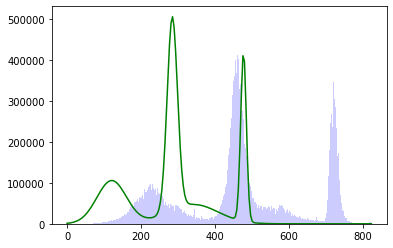

In [ ]:
ms=[232.37,460.27,553.03,722.86]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_ind)

n, bins, patches = plt.hist(arr_ind, df_ind['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ind['date'].min(),df_ind['date'].max(),200).reshape(200,1)

Y1 = arr_ind.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ind.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_ind.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y2b = arr_ind.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

ior = Y1/max(Y1)+(Y2+Y2b)/max(Y2+Y2b)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)

new_india_overall = y1+y2+y3+y2b
plt.plot(x,new_india_overall*arr_ind.size/100, c='green')

[[1.07461155]]


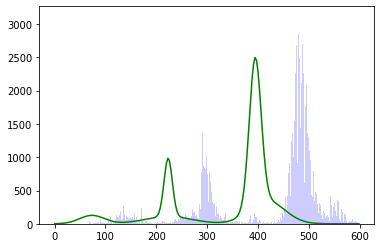

In [ ]:
ms=[139.873,257.044,299.802,482.366,499.212]
ms=np.array(ms)
ms=ms.reshape(5,1)
sum=0.059+0.032+0.169+0.307+0.194
ws=[0.059/sum,0.032/sum,0.169/sum,0.307/sum,0.194/sum]
ws=np.array(ws)
g=GaussianMixture(n_components=5, random_state=0,means_init=ms,weights_init=ws).fit(arr_zim)

n, bins, patches = plt.hist(arr_zim, df_zim['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zim['date'].min(),df_zim['date'].max(),200).reshape(200,1)

Y1 = arr_zim.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_zim.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_zim.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y4 = arr_zim.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y5 = arr_zim.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

zor = Y1/max(Y1)+(Y2+Y3)/max(Y2+Y3)+(Y4+Y5)/max(Y4+Y5)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y4 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y5 = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_zim_overall = y1+y2+y3+y4+y5

plt.plot(x,new_zim_overall*arr_zim.size/100, c='green')

[[1.24289448]]


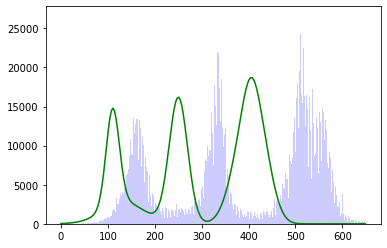

In [ ]:
ms=[145.41,164.50,332.79,506.20,538.45,566.85]
ms=np.array(ms)
ms=ms.reshape(6,1)
g=GaussianMixture(n_components=6, random_state=0,means_init=ms).fit(arr_sa)

n, bins, patches = plt.hist(arr_sa, df_sa['new_cases'].size, facecolor='blue', alpha=0.2)
# x = np.linspace(df_sa['date'].min(),df_sa['date'].max(),200).reshape(200,1)
x = np.linspace(df_sa['date'].min(),df_sa['date'].max(),200).reshape(200,1)

Y1 = arr_sa.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_sa.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_sa.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_sa.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_sa.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))
Y3c = arr_sa.size*g.weights_[5]*stats.norm.pdf(x,g.means_[5],np.sqrt(g.covariances_[5]))

saor = (Y1+Y1b)/max(Y1+Y1b)+Y2/max(Y2)+(Y3+Y3b+Y3c)/max(Y3+Y3b+Y3c)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[5] - g.means_[0] + 3*np.sqrt(g.covariances_[5]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y1b = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3b = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)
y3c = 100*g.weights_[5]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[5]-g.means_[0])/dist,np.sqrt(g.covariances_[5])/dist)

new_sa_overall = y1+y1b+y2+y3+y3b+y3c

plt.plot(x,new_sa_overall*arr_sa.size/100, c='green')

[[1.10264032]]


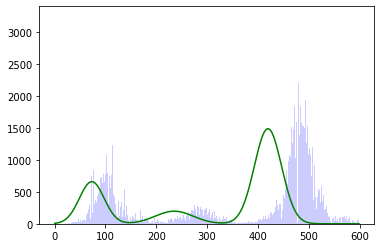

In [ ]:
ms=[104.08,282.89,486.08]
ms=np.array(ms)
ms=ms.reshape(3,1)
g=GaussianMixture(n_components=3, random_state=0,means_init=ms).fit(arr_afg)

n, bins, patches = plt.hist(arr_afg, df_afg['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_afg['date'].min(),df_afg['date'].max(),200).reshape(200,1)

Y1 = arr_afg.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_afg.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_afg.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

afgor = Y1/max(Y1)+Y2/max(Y2)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[2] - g.means_[0] + 3*np.sqrt(g.covariances_[2]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)

new_afg_overall = y1+y2+y3
plt.plot(x,new_afg_overall*arr_afg.size/100, c='green')

[[1.44832353]]


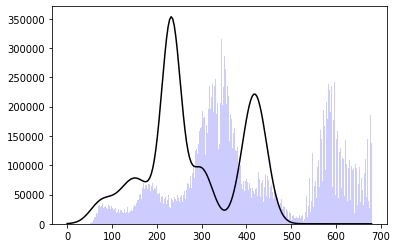

In [ ]:
ms=[109.31,205.33,332,431.90,603.21]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_us)

n, bins, patches = plt.hist(arr_us, df_us['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_us['date'].min(),df_us['date'].max(),200).reshape(200,1)

Y1 = arr_us.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_us.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_us.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y2b = arr_us.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3 = arr_us.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

usor = (Y1+Y1b)/max(Y1+Y1b) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y1b = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y2b = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3 = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_us_overall = y1 + y1b + y2 + y2b + y3
plt.plot(x,new_us_overall*arr_us.size/100,c="black")

[[1.20840595]]


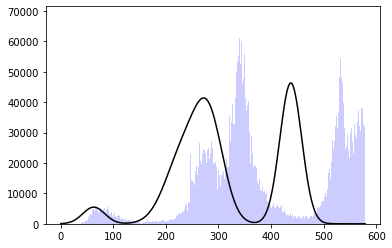

In [ ]:
ms=[85,275,330,520]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, means_init=ms).fit(arr_uk)

n, bins, patches = plt.hist(arr_uk, df_uk['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_uk['date'].min(),df_uk['date'].max(),200).reshape(200,1)

Y1 = arr_uk.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_uk.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_uk.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_uk.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))

ukor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)

new_uk_overall = y1 + y2 + y2b + y3

plt.plot(x,new_uk_overall*arr_uk.size/100,c="black")

[[1.21971171]]


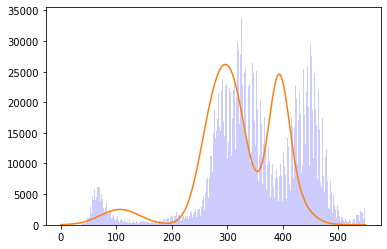

In [ ]:
ms=[73.66,294.90,337.85,442,447]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_ger)

n, bins, patches = plt.hist(arr_ger, df_ger['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ger['date'].min(),df_ger['date'].max(),200).reshape(200,1)

Y1 = arr_ger.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ger.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_ger.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_ger.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_ger.size*g.weights_[4]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[4]))

gor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + (Y3+Y3b)/max(Y3+Y3b)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3b = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_ger_overall = y1 + y2 + y2b + y3 +y3b
plt.plot(x,new_ger_overall*arr_ger.size/100)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(200, 1)
(200, 1)


In [ ]:
ior = np.ravel(ior)
zor = np.ravel(zor)
saor = np.ravel(saor)
afgor = np.ravel(afgor)
usor = np.ravel(usor)
ukor = np.ravel(ukor)
gor = np.ravel(gor)
new_india_overall = np.ravel(new_india_overall)
new_zim_overall = np.ravel(new_zim_overall)
new_sa_overall = np.ravel(new_sa_overall)
new_afg_overall = np.ravel(new_afg_overall)
new_us_overall = np.ravel(new_us_overall)
new_uk_overall = np.ravel(new_uk_overall)
new_ger_overall = np.ravel(new_ger_overall)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(200,)
(200,)


In [ ]:
print("Ind vs Zim : ",ks_2samp(ior, zor))
print("Ind vs SA : ",ks_2samp(ior, saor))
print("Ind vs Afg : ",ks_2samp(ior, afgor))
print("Ind vs USA : ",ks_2samp(ior, usor))
print("Ind vs UK : ",ks_2samp(ior, ukor))
print("Ind vs Ger : ",ks_2samp(ior, gor))
print("\n")
print("Ind vs Zim : ",ks_2samp(new_india_overall, new_zim_overall))
print("Ind vs SA : ",ks_2samp(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",ks_2samp(new_india_overall, new_afg_overall))
print("Ind vs USA : ",ks_2samp(new_india_overall, new_us_overall))
print("Ind vs UK : ",ks_2samp(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",ks_2samp(new_india_overall, new_ger_overall))

Ind vs Zim :  Ks_2sampResult(statistic=0.105, pvalue=0.220541217580421)
Ind vs SA :  Ks_2sampResult(statistic=0.18, pvalue=0.0030098470801667434)
Ind vs Afg :  Ks_2sampResult(statistic=0.235, pvalue=2.9607827368482373e-05)
Ind vs USA :  Ks_2sampResult(statistic=0.44, pvalue=8.754091889378733e-18)
Ind vs UK :  Ks_2sampResult(statistic=0.245, pvalue=1.1150402145378719e-05)
Ind vs Ger :  Ks_2sampResult(statistic=0.25, pvalue=6.734842895808746e-06)


Ind vs Zim :  Ks_2sampResult(statistic=0.235, pvalue=2.9607827368482373e-05)
Ind vs SA :  Ks_2sampResult(statistic=0.17, pvalue=0.006094418258803505)
Ind vs Afg :  Ks_2sampResult(statistic=0.24, pvalue=1.8266119303942767e-05)
Ind vs USA :  Ks_2sampResult(statistic=0.19, pvalue=0.0014264303851701861)
Ind vs UK :  Ks_2sampResult(statistic=0.23, pvalue=4.7487878961137165e-05)
Ind vs Ger :  Ks_2sampResult(statistic=0.26, pvalue=2.3797467071606504e-06)


In [ ]:
from scipy.stats import epps_singleton_2samp as epps
print("Ind vs Zim : ",epps(ior, zor))
print("Ind vs SA : ",epps(ior, saor))
print("Ind vs Afg : ",epps(ior, afgor))
print("Ind vs USA : ",epps(ior, usor))
print("Ind vs UK : ",epps(ior, ukor))
print("Ind vs Ger : ",epps(ior, gor))
print("\n")
print("Ind vs Zim : ",epps(new_india_overall, new_zim_overall))
print("Ind vs SA : ",epps(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",epps(new_india_overall, new_afg_overall))
print("Ind vs USA : ",epps(new_india_overall, new_us_overall))
print("Ind vs UK : ",epps(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",epps(new_india_overall, new_ger_overall))

Ind vs Zim :  Epps_Singleton_2sampResult(statistic=2.3826036083298954, pvalue=0.6657733339297436)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=5.847574814393735, pvalue=0.21082433147189003)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=20.11834033032506, pvalue=0.000473238909855493)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=106.99883681582565, pvalue=3.176067092975333e-22)
Ind vs UK :  Epps_Singleton_2sampResult(statistic=21.824727974465485, pvalue=0.00021717933091439372)
Ind vs Ger :  Epps_Singleton_2sampResult(statistic=26.660354431471276, pvalue=2.3282475444963634e-05)


Ind vs Zim :  Epps_Singleton_2sampResult(statistic=9.001717846640668, pvalue=0.0610565573069297)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=44.3190707909314, pvalue=5.507644483695521e-09)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=11.701937467173732, pvalue=0.01971099513310235)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=30.97792028125325, pvalue=3.093309309957793e-06)
Ind vs

In [ ]:
from scipy.stats import brunnermunzel as bmz
print("Ind vs Zim : ",bmz(ior, zor))
print("Ind vs SA : ",bmz(ior, saor))
print("Ind vs Afg : ",bmz(ior, afgor))
print("Ind vs USA : ",bmz(ior, usor))
print("Ind vs UK : ",bmz(ior, ukor))
print("Ind vs Ger : ",bmz(ior, gor))
print("\n")
print("Ind vs Zim : ",bmz(new_india_overall, new_zim_overall))
print("Ind vs SA : ",bmz(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",bmz(new_india_overall, new_afg_overall))
print("Ind vs USA : ",bmz(new_india_overall, new_us_overall))
print("Ind vs UK : ",bmz(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",bmz(new_india_overall, new_ger_overall))

Ind vs Zim :  BrunnerMunzelResult(statistic=-1.4483872138711573, pvalue=0.14829878660773982)
Ind vs SA :  BrunnerMunzelResult(statistic=2.208950409472715, pvalue=0.027749401154960607)
Ind vs Afg :  BrunnerMunzelResult(statistic=4.263836525509174, pvalue=2.5152982380927114e-05)
Ind vs USA :  BrunnerMunzelResult(statistic=9.340784843578648, pvalue=0.0)
Ind vs UK :  BrunnerMunzelResult(statistic=4.39146130076532, pvalue=1.4461600599702251e-05)
Ind vs Ger :  BrunnerMunzelResult(statistic=4.562329961852078, pvalue=6.747936933892973e-06)


Ind vs Zim :  BrunnerMunzelResult(statistic=2.27778227801853, pvalue=0.023376561058046086)
Ind vs SA :  BrunnerMunzelResult(statistic=2.1525488920196225, pvalue=0.03196913190699524)
Ind vs Afg :  BrunnerMunzelResult(statistic=3.636462174133348, pvalue=0.00031424814396863177)
Ind vs USA :  BrunnerMunzelResult(statistic=2.556180280412185, pvalue=0.010967459360987863)
Ind vs UK :  BrunnerMunzelResult(statistic=3.839531820832304, pvalue=0.0001437782738258342)


In [ ]:
! pip install similaritymeasures
import similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 5.1 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=d1774404b384297b831a92404c64f6704aa94637d0466f350c0266b3ea30906d
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
print("Ind vs Zim : ",similaritymeasures.frechet_dist(ior, zor))
print("Ind vs SA : ",similaritymeasures.frechet_dist(ior, saor))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(ior, afgor))
print("Ind vs USA : ",similaritymeasures.frechet_dist(ior, usor))
print("Ind vs UK : ",similaritymeasures.frechet_dist(ior, ukor))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(ior, gor))
print("\n")
print("Ind vs Zim : ",similaritymeasures.frechet_dist(new_india_overall, new_zim_overall))
print("Ind vs SA : ",similaritymeasures.frechet_dist(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(new_india_overall, new_afg_overall))
print("Ind vs USA : ",similaritymeasures.frechet_dist(new_india_overall, new_us_overall))
print("Ind vs UK : ",similaritymeasures.frechet_dist(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(new_india_overall, new_ger_overall))

Ind vs Zim :  0.09562504677386519
Ind vs SA :  0.10356883695723185
Ind vs Afg :  0.11229722799280945
Ind vs USA :  0.47704053622363707
Ind vs UK :  0.2971061635829849
Ind vs Ger :  0.34833979819852984


Ind vs Zim :  0.6998177352776775
Ind vs SA :  0.539614178100922
Ind vs Afg :  0.4896539300841222
Ind vs USA :  0.4883089811765963
Ind vs UK :  0.4991039247468855
Ind vs Ger :  0.5458601000305301


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))

Ind vs Zim :  2.3098192845293255
Ind vs SA :  2.743899729275636
Ind vs Afg :  2.8550810495929104
Ind vs USA :  9.123181891373736
Ind vs UK :  7.052912555052542
Ind vs Ger :  8.595536187177698


Ind vs Zim :  17.092722957957683
Ind vs SA :  10.051409918353704
Ind vs Afg :  13.584781246881409
Ind vs USA :  7.472384849255539
Ind vs UK :  9.109232711617318
Ind vs Ger :  9.688520685854355


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))

Ind vs Zim :  7.92169002725319
Ind vs SA :  6.250229266794322
Ind vs Afg :  6.860723807394885
Ind vs USA :  19.505655756173095
Ind vs UK :  11.41136452646279
Ind vs Ger :  20.008957484964256


Ind vs Zim :  29.362710359836523
Ind vs SA :  15.993210412163275
Ind vs Afg :  18.646362095691277
Ind vs USA :  7.435984506544252
Ind vs UK :  13.865450137201755
Ind vs Ger :  12.9263277868091


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])

Ind vs Zim :  54.161137685057504
Ind vs SA :  56.99841302848186
Ind vs Afg :  79.8002644592
Ind vs USA :  60.67130358952808
Ind vs UK :  83.3322654255529
Ind vs Ger :  90.25915758138856


Ind vs Zim :  41.00386966380471
Ind vs SA :  28.818021291114995
Ind vs Afg :  38.85407139167689
Ind vs USA :  19.434967461231043
Ind vs UK :  41.074958874121926
Ind vs Ger :  43.51139381428193


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))

Ind vs Zim :  54.157856627586874
Ind vs SA :  56.99726076146142
Ind vs Afg :  79.79997261644368
Ind vs USA :  60.58993091889302
Ind vs UK :  83.18240247138172
Ind vs Ger :  90.25116098256211


Ind vs Zim :  41.00303605733892
Ind vs SA :  28.817178812269134
Ind vs Afg :  38.85312140539196
Ind vs USA :  19.433996369472396
Ind vs UK :  41.07404369685129
Ind vs Ger :  43.510533868489155


In [ ]:
print("Ind vs Zim : ",np.corrcoef(ior, zor)[0,1])
print("Ind vs SA : ",np.corrcoef(ior, saor)[0,1])
print("Ind vs Afg : ",np.corrcoef(ior, afgor)[0,1])
print("Ind vs USA : ",np.corrcoef(ior, usor)[0,1])
print("Ind vs UK : ",np.corrcoef(ior, ukor)[0,1])
print("Ind vs Ger : ",np.corrcoef(ior, gor)[0,1])
print("\n")
print("Ind vs Zim : ",np.corrcoef(new_india_overall, new_zim_overall)[0,1])
print("Ind vs SA : ",np.corrcoef(new_india_overall, new_sa_overall)[0,1])
print("Ind vs Afg : ",np.corrcoef(new_india_overall, new_afg_overall)[0,1])
print("Ind vs USA : ",np.corrcoef(new_india_overall, new_us_overall)[0,1])
print("Ind vs UK : ",np.corrcoef(new_india_overall, new_uk_overall)[0,1])
print("Ind vs Ger : ",np.corrcoef(new_india_overall, new_ger_overall)[0,1])

Ind vs Zim :  0.23114764779869615
Ind vs SA :  0.26496109442409377
Ind vs Afg :  -0.1093778221125864
Ind vs USA :  0.51557908933903
Ind vs UK :  -0.10365239100855983
Ind vs Ger :  -0.1914301052269719


Ind vs Zim :  -0.02123400422750987
Ind vs SA :  0.3047502602275829
Ind vs Afg :  -0.11174741141863946
Ind vs USA :  0.70395437700505
Ind vs UK :  0.010414504727562616
Ind vs Ger :  -0.0548814749020985


In [ ]:
from scipy.spatial import procrustes as prc
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])

Ind vs Zim :  4.6631994348051835e-05
Ind vs SA :  4.34189068112559e-05
Ind vs Afg :  6.0510004047389595e-05
Ind vs USA :  2.9008962105950556e-05
Ind vs UK :  6.284176211693753e-05
Ind vs Ger :  5.7038180085637265e-05


Ind vs Zim :  5.0051584034216326e-05
Ind vs SA :  1.8092255837595475e-05
Ind vs Afg :  2.7792776469891497e-05
Ind vs USA :  7.743603507786905e-06
Ind vs UK :  2.6227665955038238e-05
Ind vs Ger :  2.6915160683133597e-05


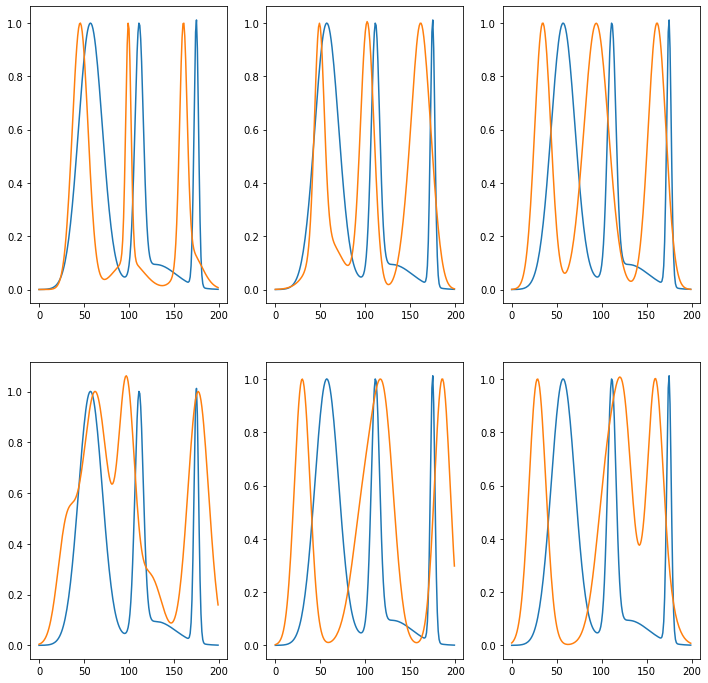

In [ ]:
x=np.array(range(200))

plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(2, 3, 1)
plt.plot(x,ior)
plt.plot(x,zor)

plt.subplot(2, 3, 2)
plt.plot(x,ior)
plt.plot(x,saor)

plt.subplot(2, 3, 3)
plt.plot(x,ior)
plt.plot(x,afgor)

plt.subplot(2, 3, 4)
plt.plot(x,ior)
plt.plot(x,usor)

plt.subplot(2, 3, 5)
plt.plot(x,ior)
plt.plot(x,ukor)

plt.subplot(2, 3, 6)
plt.plot(x,ior)
plt.plot(x,gor)

plt.show()

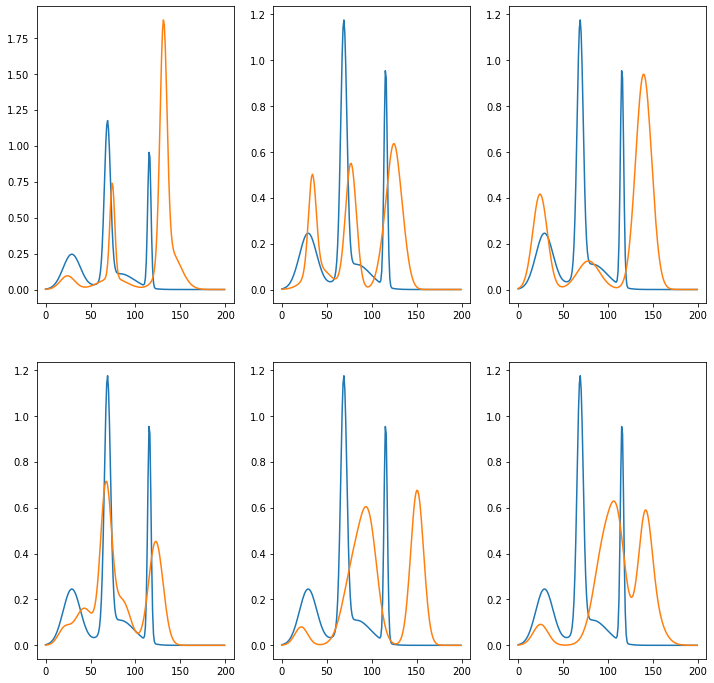

In [ ]:
x=np.array(range(200))

plt.subplot(2, 3, 1)
plt.plot(x,new_india_overall)
plt.plot(x,new_zim_overall)

plt.subplot(2, 3, 2)
plt.plot(x,new_india_overall)
plt.plot(x,new_sa_overall)

plt.subplot(2, 3, 3)
plt.plot(x,new_india_overall)
plt.plot(x,new_afg_overall)

plt.subplot(2, 3, 4)
plt.plot(x,new_india_overall)
plt.plot(x,new_us_overall)

plt.subplot(2, 3, 5)
plt.plot(x,new_india_overall)
plt.plot(x,new_uk_overall)

plt.subplot(2, 3, 6)
plt.plot(x,new_india_overall)
plt.plot(x,new_ger_overall)

plt.show()